<a href="https://colab.research.google.com/github/jrichwiltshire/hands-on-data-science/blob/main/ch4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook Setup

In [1]:
# Python >=3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [2]:
# Scikit-Learn >=0.20 is required
import sklearn
assert sklearn.__version__ >= '0.20'

In [3]:
#Common imports
import numpy as np
import os
from datetime import datetime

In [4]:
# to make this notebook's output stable across runs
np.random.seed(42)

In [5]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#Github Setup

In [7]:
!ssh-keygen -t rsa -b 4096

Generating public/private rsa key pair.
Enter file in which to save the key (/root/.ssh/id_rsa): 
Enter passphrase (empty for no passphrase): 
Enter same passphrase again: 
Your identification has been saved in /root/.ssh/id_rsa.
Your public key has been saved in /root/.ssh/id_rsa.pub.
The key fingerprint is:
SHA256:WrHwekY5fmOm1y9imvIW9Zh2P9i/GA8QVAARIggsNY0 root@b9b56d41f761
The key's randomart image is:
+---[RSA 4096]----+
|.o+o.. . ++oo.   |
|..Eo. . . .      |
|.     . .  .     |
|       o +. .    |
|        S. =     |
|       *..+ +    |
|      o +o=o *   |
|      .o.*+.+ O  |
|       +=+ . +.=o|
+----[SHA256]-----+


In [8]:
!ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts

# github.com:22 SSH-2.0-babeld-17a926d7


In [9]:
!cat /root/.ssh/id_rsa.pub

ssh-rsa AAAAB3NzaC1yc2EAAAADAQABAAACAQC8Pg6mYWABhtM20L7UYDeFLGx6dWkqmhaDFqbx8MJqL+Pv9DfCa7sFztvAgX+m74MWRDBH+RJ/nJg3AhFg4dwcjMo/+CxfwzjnozD0o8gCADcbwYbsmEUpShnmWiygTlB1Oy+0JDgwFyXE+TLbIzUSdgBq+YTkMrxT8V3jJMPXzwEoABpoAA93qy5sucrN91xJBhMUy4ugKQeW1x0cQgo/rS2aklY+E/WLQupqkaK6WwN9rQzwmT1KtnI+5UTYyVg+2w0U1sQuxSU+Bil1Dq+swVK8Jp/KELltUZIwoBl8zBtFZhFbzc2A7ob7MzpB1Y9PR55xKTcgzyxjDbUamETqR86rRfTyzj/MJhAMrK8zj/OBUuhqFiqR4kncM3DJQ9+FaDz4EDbDAuAoTGF8h1TyN10sgjVoSK10kTQmpr0/BjSl1A1t0sdY0aZVeQBUfQjyT77QqOh2DL51tQRWWQ59QLgyp37eOmdite7SSx5XAgeIseVoDvKU9BwlXHHnVP4S647JSARq4Hld4Go5D8qY4ElXVJE9TnKib9J8h/r0d57T6JQmRUFoivqgDCqEM18T4xREFjDkQyzAPthjjkQGYwAqfTywTDREi0l9qf78j5rrmjrkQQFLo3D+zKorsAVP6oQWN1mLIhfIP19yXGfhyLTWH7drfXr3Lvi9lKiYFw== root@b9b56d41f761


In [11]:
!ssh -T git@github.com

Hi jrichwiltshire! You've successfully authenticated, but GitHub does not provide shell access.


In [13]:
!git clone git@github.com:jrichwiltshire/hands-on-data-science.git

Cloning into 'hands-on-data-science'...
remote: Enumerating objects: 74, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 74 (delta 7), reused 13 (delta 1), pack-reused 48
Receiving objects: 100% (74/74), 1.21 MiB | 20.06 MiB/s, done.
Resolving deltas: 100% (19/19), done.


In [67]:
%cd /content/hands-on-data-science/

/content/hands-on-data-science


In [68]:
!git pull

Already up to date.


In [70]:
!git config --global user.email jrichwiltshire@gmail.com
!git config --global user.name jrichwiltshire

In [71]:
!git remote -v

origin	git@github.com:jrichwiltshire/hands-on-data-science.git (fetch)
origin	git@github.com:jrichwiltshire/hands-on-data-science.git (push)


In [72]:
#Where to save the figures
PROJECT_ROOT_DIR = os.getcwd()
CHAPTER_ID = 'training_linear_models'
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, 'images', CHAPTER_ID)
IMAGES_PATH

'/content/hands-on-data-science/images/training_linear_models'

In [75]:
os.makedirs(IMAGES_PATH, exist_ok=True)

In [76]:
def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
  path = os.path.join(IMAGES_PATH, fig_id + '.' + fig_extension)
  print('Saving figure', fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)

#Linear Regression

##The Normal Equation

In [77]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Saving figure generated_data_plot


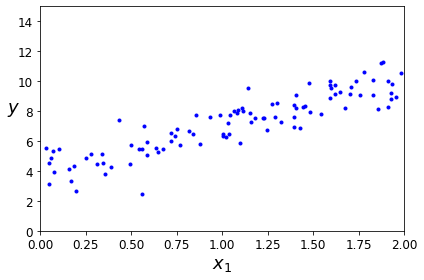

In [78]:
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig('generated_data_plot')

In [79]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [80]:
theta_best

array([[3.86501051],
       [3.13916179]])

In [81]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.86501051],
       [10.14333409]])

(0.0, 2.0, 0.0, 15.0)

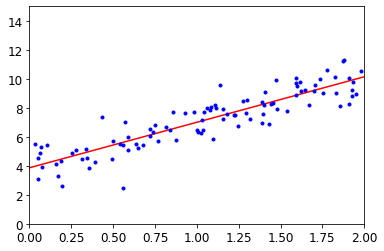

In [82]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])

Saving figure linear_model_predictions_plot


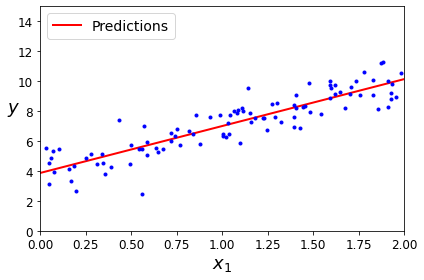

In [83]:
plt.plot(X_new, y_predict, 'r-', linewidth=2, label='Predictions')
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.legend(loc='upper left', fontsize=14)
plt.axis([0, 2, 0, 15])
save_fig('linear_model_predictions_plot')

In [84]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.86501051]), array([[3.13916179]]))

In [85]:
lin_reg.predict(X_new)

array([[ 3.86501051],
       [10.14333409]])

In [86]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.86501051],
       [3.13916179]])

In [87]:
np.linalg.pinv(X_b).dot(y)

array([[3.86501051],
       [3.13916179]])

#Gradient Descent

##Batch Gradient Descent

In [88]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

In [89]:
theta

array([[3.86501051],
       [3.13916179]])

In [90]:
X_new_b.dot(theta)

array([[ 3.86501051],
       [10.14333409]])

In [91]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
  m = len(X_b)
  plt.plot(X, y, 'b.')
  n_iterations = 1000
  for iteration in range(n_iterations):
    if iteration < 10:
      y_predict = X_new_b.dot(theta)
      style = 'b-' if iteration > 0 else 'r--'
      plt.plot(X_new, y_predict, style)
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    if theta_path is not None:
      theta_path.append(theta)
  plt.xlabel('$x_1$', fontsize=18)
  plt.axis([0, 2, 0, 15])
  plt.title(r'$\eta = {}$'.format(eta), fontsize=16)

Saving figure gradient_descent_plot


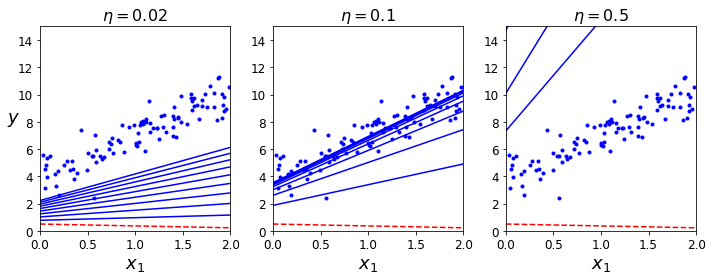

In [92]:
np.random.seed(42)
theta = np.random.randn(2,1) # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig('gradient_descent_plot')

## Stochastic Gradient Descent

In [93]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

Saving figure sgd_plot


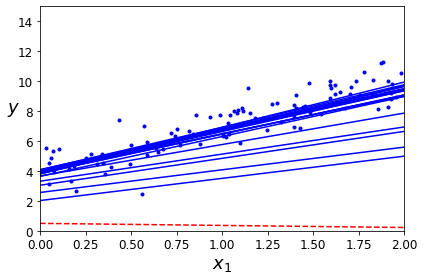

In [94]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
  for i in range(m):
    if epoch == 0 and i < 20:
      y_predict = X_new_b.dot(theta)
      style = 'b-' if i > 0 else 'r--'
      plt.plot(X_new, y_predict, style)
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients
    theta_path_sgd.append(theta)

plt.plot(X, y, 'b.')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig('sgd_plot')

In [95]:
theta

array([[3.90521218],
       [3.15642095]])

In [96]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [97]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.86256592]), array([3.15101583]))

## Mini-batch gradient descent

In [98]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2, 1) # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) -  yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [99]:
theta

array([[3.87558894],
       [3.13893713]])

In [100]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

Saving figure gradient_descent_paths_plot


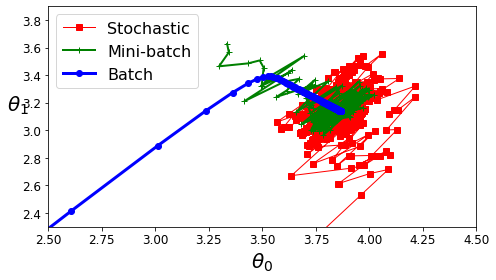

In [101]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], 'r-s', linewidth=1, label='Stochastic')
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], 'g-+', linewidth=2, label='Mini-batch')
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], 'b-o', linewidth=3, label='Batch')
plt.legend(loc='upper left', fontsize=16)
plt.xlabel(r'$\theta_0$', fontsize=20)
plt.ylabel(r'$\theta_1$', fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
save_fig('gradient_descent_paths_plot')

# Polynomial Regression

In [102]:
import numpy as np
import numpy.random as rnd

rnd.seed(42)

In [103]:
m = 100
X = 6 * rnd.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + rnd.randn(m, 1)

Saving figure quadratic_data_plot


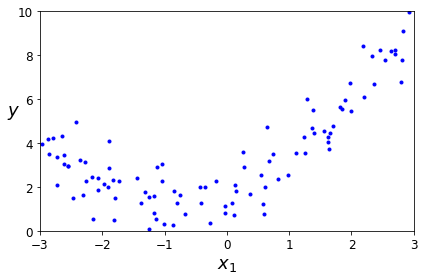

In [104]:
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig('quadratic_data_plot')

In [105]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [106]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [107]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

Saving figure quadratic_predictions_plot


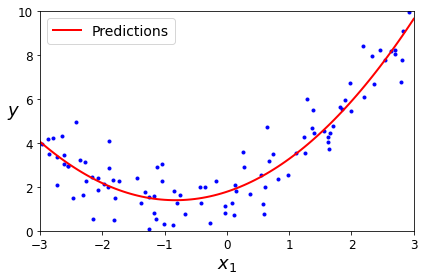

In [108]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, 'b.')
plt.plot(X_new, y_new, 'r-', linewidth=2, label='Predictions')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.legend(loc='upper left', fontsize=14)
plt.axis([-3, 3, 0, 10])
save_fig('quadratic_predictions_plot')

Saving figure high_degree_polynomials_plot


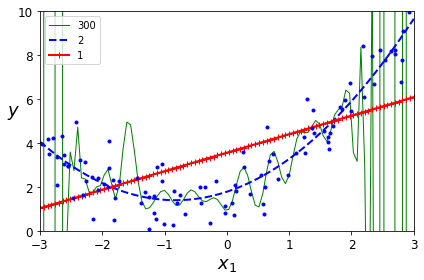

In [109]:
from numpy.lib import stride_tricks
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (('g-', 1, 300), ('b--', 2, 2), ('r-+', 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
                                      ('poly_features', polybig_features),
                                      ('std_scaler', std_scaler),
                                      ('lin_reg', lin_reg),
    ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, 'b.', linewidth=3)
plt.legend(loc='upper left')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig('high_degree_polynomials_plot')

# Learning Curves

In [110]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error (y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
    plt.legend(loc='upper right', fontsize=14)
    plt.xlabel('Training set size', fontsize=14)
    plt.ylabel('RMSE', fontsize=14)

Saving figure underfitting_learning_cuvrves_plot


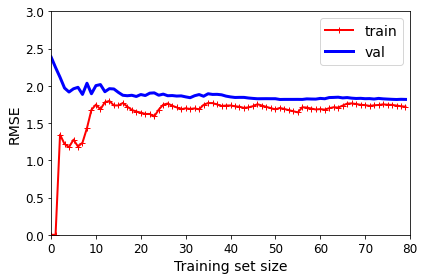

In [111]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
save_fig('underfitting_learning_cuvrves_plot')

Saving figure learning_curves_plot


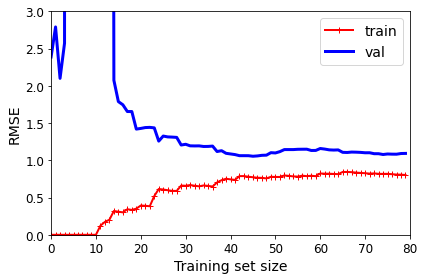

In [112]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
        ('lin_reg', LinearRegression()),                              
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
save_fig('learning_curves_plot')

# Regularized Linear Models

## Ridge Regression

In [113]:
rnd.seed(42)
m = 20
X = 3 * rnd.rand(m, 1)
y = 1 + 0.5 * X + rnd.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [114]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky', random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [115]:
ridge_reg = Ridge(alpha=1, solver='sag', random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

Saving figure ridge_regression_plot


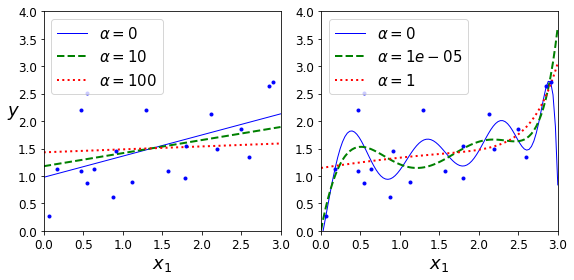

In [116]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ('b-', 'g--', 'r:')):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
                ('std_scaler', StandardScaler()),
                ('regul_reg', model),
            ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r'$\alpha = {}$'.format(alpha))
    plt.plot(X, y, 'b.', linewidth=3)
    plt.legend(loc='upper left', fontsize=15)
    plt.xlabel('$x_1$', fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

save_fig('ridge_regression_plot')

In [117]:
sgd_reg = SGDRegressor(penalty='l2', max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

## Lasso Regression

#### Least Absolute Shrinkage and Selection Operator Regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.803e+00, tolerance: 9.295e-04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Saving figure lasso_regression_plot


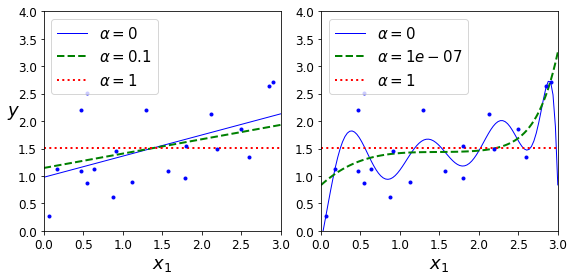

In [118]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

save_fig('lasso_regression_plot')

In [119]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

## Elastic Net

In [120]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

## Early Stopping

In [121]:
rnd.seed(42)
m = 100
X = 6 * rnd.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + rnd.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [ ]:
from copy import deepcopy

poly_scaler = Pipeline([
        ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
        ('std_scaler', StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate='constant',
                       eta0=0.0005, random_state=42)

minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean

#Save to Github

In [122]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   images/training_linear_models/generated_data_plot.png
	modified:   images/training_linear_models/gradient_descent_paths_plot.png
	modified:   images/training_linear_models/gradient_descent_plot.png
	modified:   images/training_linear_models/linear_model_predictions_plot.png
	modified:   images/training_linear_models/sgd_plot.png

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	images/training_linear_models/lasso_regression_plot.png
	images/training_linear_models/ridge_regression_plot.png

no changes added to commit (use "git add" and/or "git commit -a")


In [123]:
!git add .

In [124]:
today = datetime.today().strftime('%Y-%m-%d-%H:%M:%S')
!git commit -m 'commit time: $today'

[main e8bf4b4] commit time: 2021-12-30-18:35:49
 7 files changed, 0 insertions(+), 0 deletions(-)
 rewrite images/training_linear_models/generated_data_plot.png (98%)
 rewrite images/training_linear_models/gradient_descent_paths_plot.png (88%)
 rewrite images/training_linear_models/gradient_descent_plot.png (96%)
 create mode 100644 images/training_linear_models/lasso_regression_plot.png
 rewrite images/training_linear_models/linear_model_predictions_plot.png (98%)
 create mode 100644 images/training_linear_models/ridge_regression_plot.png
 rewrite images/training_linear_models/sgd_plot.png (97%)


In [125]:
!git push

Counting objects: 11, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (10/10), done.
Writing objects: 100% (11/11), 721.39 KiB | 11.63 MiB/s, done.
Total 11 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To github.com:jrichwiltshire/hands-on-data-science.git
   77004f1..e8bf4b4  main -> main
